# Importing Necessary Libraries & Functions

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split

def clear():
    from IPython.display import clear_output
    return clear_output(wait=True)
def best_random_state_wizard(test_size,df,real_vars,target):
    best_skor=0
    best_split_number=0
    for i in range(0,2**32-1):
        x_train, x_test, y_train, y_test = train_test_split(df[real_vars], df[target],test_size=(test_size/100),random_state=i)
        train_df,test_df=train_test_df_maker(x_train, x_test, y_train, y_test)
        skor=show_split_performance_2(train_df, test_df)
        if skor > best_skor:
            best_skor=skor
            best_split_number=i
            print(datetime.now(),best_split_number,best_skor)
            
    return best_split_number       
def colorization():
    colors = ["blue","green","red","black","magenta","darkblue","green","blue","orange"]
    rast = np.random.randint(0,len(colors))
    return colors[rast]
class c:
    P = '\033[95m'  #purple
    C = '\033[96m'  #cyan
    D = '\033[36m'  #darkcyan
    BL = '\033[94m'  #blue
    G = '\033[92m'  #green
    Y = '\033[93m'  #yellow
    R = '\033[91m'  #red
    B = '\033[1m'  #bold
    U = '\033[4m'  #underline
    E = '\033[0m'  #end
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)

    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns
def describe_myway(df):
    return df.describe().T.style.bar(
        subset=['mean'],
        color=px.colors.qualitative.Pastel[4]).background_gradient(
            subset=['std'], cmap='Greens')
def show_split_performance_2(train_df, test_df):
    #made by seyidcem in order to suppor best_random_state_wizard function
    a = pd.DataFrame(train_df.describe())
    b = pd.DataFrame(test_df.describe())

    all_std = []
    all_mean = []
    all_max = []
    all_min = []

    for i in a:
        if abs((a[i]["std"])) <= abs((b[i]["std"])):
            all_std.append((a[i]["std"]) / (b[i]["std"]))
        elif abs((a[i]["std"])) >= abs((b[i]["std"])):
            all_std.append((b[i]["std"]) / (a[i]["std"]))
    for i in a:
        if abs((a[i]["mean"])) <= abs((b[i]["mean"])):
            all_mean.append((abs(a[i]["mean"])) / (abs(b[i]["mean"])))
        elif abs((a[i]["mean"])) >= abs((b[i]["mean"])):
            all_mean.append((abs(b[i]["mean"])) / (abs(a[i]["mean"])))
    for i in a:
        if abs((a[i]["max"])) <= abs((b[i]["max"])):
            all_max.append((a[i]["max"]) / (b[i]["max"]))
        elif abs((a[i]["max"])) >= abs((b[i]["max"])):
            all_max.append((b[i]["max"]) / (a[i]["max"]))
    for i in a:
        if abs((a[i]["min"])) <= abs((b[i]["min"])):
            all_min.append((a[i]["min"]) / (b[i]["min"]))
        elif abs((a[i]["min"])) >= abs((b[i]["min"])):
            all_min.append((b[i]["min"]) / (a[i]["min"]))
    return np.mean(all_std)
def show_split_performance(train_df, test_df):
    
    a = pd.DataFrame(train_df.describe())
    b = pd.DataFrame(test_df.describe())

    all_std = []
    all_mean = []
    all_max = []
    all_min = []

    for i in a:
        if abs((a[i]["std"])) <= abs((b[i]["std"])):
            all_std.append((a[i]["std"]) / (b[i]["std"]))
        elif abs((a[i]["std"])) >= abs((b[i]["std"])):
            all_std.append((b[i]["std"]) / (a[i]["std"]))
#     for i in a:
#         if abs((a[i]["mean"])) <= abs((b[i]["mean"])):
#             all_mean.append((a[i]["mean"]) / (b[i]["mean"]))
#         elif abs((a[i]["mean"])) >= abs((b[i]["mean"])):
#             all_mean.append((b[i]["mean"]) / (a[i]["mean"]))
    for i in a:
        if abs((a[i]["mean"])) <= abs((b[i]["mean"])):
            all_mean.append((abs(a[i]["mean"])) / (abs(b[i]["mean"])))
        elif abs((a[i]["mean"])) >= abs((b[i]["mean"])):
            all_mean.append((abs(b[i]["mean"])) / (abs(a[i]["mean"])))
    for i in a:
        if abs((a[i]["max"])) <= abs((b[i]["max"])):
            all_max.append((a[i]["max"]) / (b[i]["max"]))
        elif abs((a[i]["max"])) >= abs((b[i]["max"])):
            all_max.append((b[i]["max"]) / (a[i]["max"]))
    for i in a:
        if abs((a[i]["min"])) <= abs((b[i]["min"])):
            all_min.append((a[i]["min"]) / (b[i]["min"]))
        elif abs((a[i]["min"])) >= abs((b[i]["min"])):
            all_min.append((b[i]["min"]) / (a[i]["min"]))

    d = {"std": all_std, "mean": all_mean, "max": all_max, "min": all_min}
    split_df = pd.DataFrame(d, index=a.columns)
    split_df = split_df.style.background_gradient().highlight_null(
        null_color="red")
    return split_df
def show_variables(df):
    vars_dict = {}
    var_i = 0
    for i in df.columns:
        vars_dict[var_i] = i
        var_i += 1
    for i in vars_dict:
        print(i, " =>", vars_dict[i])
    return vars_dict
def selecting_inputs(vars_dict):
    chosen = []
    while True:
        clear()
        a = int(
            input(
                f"{c.BL} Select the keys of input variables by selecting index numbers:{c.E} \n {c.B}{c.G}%% when you finished please write = 10000  \n for all variables write = 10001 %%{c.E} \n"
            ))
        if a == 10000:
            print(f"{c.B}{c.BL}Input variable selection completed !{c.E}")
            break
        elif a == 10001:
            for i in range(0, len(vars_dict)):
                chosen.append(i)
            print(
                f"{c.B}{c.BL}All avaliables variables selected as input !{c.E}")
            break

        chosen.append(a)
        clear()
    real_vars = []
    for i in chosen:
        real_vars.append(vars_dict[i])
    if target in real_vars:
        real_vars.remove(target)
    print(f"{c.B}{c.R}Selected inputs are :{c.E} \n{real_vars}")
    return real_vars
def selecting_target():
    vars_dict=show_variables(df)
    selection = int(input(f"{c.BL}Select the target variable: {c.E}"))
    target = vars_dict[selection]
    print(f"\n{c.BL}{c.B}Selected target is {c.R}{target}{c.E} !{c.E}")
    return target
def train_test_df_maker(x_train, x_test, y_train, y_test):
    c1=x_train.copy()
    c2=x_test.copy()
    train_df = c1
    test_df = c2
    train_df[target] = y_train
    test_df[target] = y_test
    return train_df,test_df

# Getting Data

In [6]:
import pandas as pd
df = pd.read_excel("database/yeni_data_3.0.xlsx")
df_yedek = pd.read_excel("database/yeni_data_3.0.xlsx")

# Data Preprocessing

## Target identification

In [7]:
target = selecting_target()

0  => qc_ave
1  => fs_ave
2  => u2_ave
3  => magnitude
4  => pga
5  => gwt
6  => manifestation
Select the target variable: 6

Selected target is manifestation !


## Showing some numerical properties of each column

In [4]:
describe_myway(df)

,count,mean,std,min,25%,50%,75%,max
qc_ave,14612.000000,10702.302733,4285.402202,560.800000,7377.750000,11381.900000,13987.980000,23898.930000
fs_ave,14612.000000,69.677113,29.139430,1.000000,47.485000,68.450000,89.110000,156.300000
u2_ave,14612.000000,23.395684,35.643401,-73.450000,-0.830000,23.270000,49.195000,127.770000
magnitude,14612.000000,6.357781,0.574436,5.700000,5.700000,6.200000,7.100000,7.100000
pga,14612.000000,0.260621,0.132742,0.048000,0.178000,0.208784,0.349000,0.674000
gwt,14612.000000,1.733520,0.667588,0.000000,1.263074,1.699470,2.152326,3.593761
manifestation,14612.000000,0.395360,0.488945,0.000000,0.000000,0.000000,1.000000,1.000000


# Scaling & Splitting

## Selecting the input variables

Lets see which variables could be as inputs 

In [11]:
vars_dict=show_variables(df)

0  => qc_ave
1  => fs_ave
2  => u2_ave
3  => magnitude
4  => pga
5  => gwt
6  => manifestation


In [12]:
real_vars=selecting_inputs(vars_dict)
x_main=df[real_vars] 
y_main=df[target]

 Select the keys of input variables by selecting index numbers: 
 %% when you finished please write = 10000  
 for all variables write = 10001 %% 
10001
All avaliables variables selected as input !
Selected inputs are : 
['qc_ave', 'fs_ave', 'u2_ave', 'magnitude', 'pga', 'gwt']


## Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,PowerTransformer,MaxAbsScaler,QuantileTransformer
df_target_dropped=df.drop(target,axis=1)

In [14]:
min_max_scaler = MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df_target_dropped)
df_sc = pd.DataFrame(scaled_df,columns=df_target_dropped.columns)
df_sc[target]=df[target]

In [15]:
df = df_sc
x_main_sc=df[real_vars] 
y_main_sc=df[target]

## Splitting

### Splitting

Variable **sd** means = seperated data (for foward calculations)

In [9]:
#1. param: test size
#2. param: df
#3. param: real_vars
#4. param: target
best_random_state_wizard(20,df,real_vars,target)

2022-08-11 13:11:36.976224 0 0.9916072231970239
2022-08-11 13:11:37.023101 2 0.9937617383183044
2022-08-11 13:11:37.172701 9 0.9952731241687462
2022-08-11 13:11:37.770143 38 0.9953092368365632
2022-08-11 13:11:37.792045 39 0.9953206225863983
2022-08-11 13:11:38.204941 57 0.998073178886055
2022-08-11 13:11:46.965739 480 0.998099612643185


KeyboardInterrupt: 

yeni_data_3.0 => Random State: 480 => 0.998

In [10]:
test_size=int(input(f"{c.B}{c.BL}Write TEST size (like %50) = %{c.E}"))
x_train, x_test, y_train, y_test = train_test_split(df[real_vars], df[target],test_size=(test_size/100),random_state=480)
sd=[x_train,y_train,x_test,y_test]
train_data=x_train.copy()
train_data[target]=y_train
test_data=x_test.copy()
test_data[target]=y_test

Write TEST size (like %50) = %20


### Split performance evaluation

For better splitting:

std,mean,max and min values for both train and test data should be close.

If they are close, ratio of it should be 1.

In [11]:
train_df,test_df=train_test_df_maker(x_train, x_test, y_train, y_test)
show_split_performance(train_df, test_df)

,std,mean,max,min
qc_ave,0.998124,0.996395,1.000000,0.000000
fs_ave,0.995726,0.997159,1.000000,0.000000
u2_ave,0.996720,0.998345,1.000000,0.000000
magnitude,0.998510,0.989040,1.000000,nan
pga,0.999297,0.998730,0.996805,0.000000
gwt,0.999066,0.990530,0.992048,nan
manifestation,0.999255,0.994989,1.000000,nan


# Deep Learning

In [40]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from livelossplot import PlotLossesKeras
from keras.models import load_model

from sklearn.metrics import classification_report,cohen_kappa_score,roc_curve
from sklearn import metrics

def work_model(model,sd):
    x_train = sd[0]
    y_train = sd[1]
    x_test = sd[2]
    y_test = sd[3]
    
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    report = classification_report(y_test, preds)
    print(report)
    print(f"\nKappa score of {model} => {round(cohen_kappa_score(y_test,model.predict(x_test)),3)} ")
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [29]:
model = keras.Sequential(
    [
        keras.layers.Dense(units=32, activation="relu", input_shape=(x_train.shape[-1],) ),
        keras.layers.Dense(units=64, activation="relu"),
        keras.layers.Dense(units=128, activation="relu"),
        keras.layers.Dense(units=256, activation="relu"),
        keras.layers.Dense(units=128, activation="relu"),
        keras.layers.Dense(units=32, activation="relu"),
        keras.layers.Dense(units=16, activation="relu"),
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [30]:
learning_rate = 0.001

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


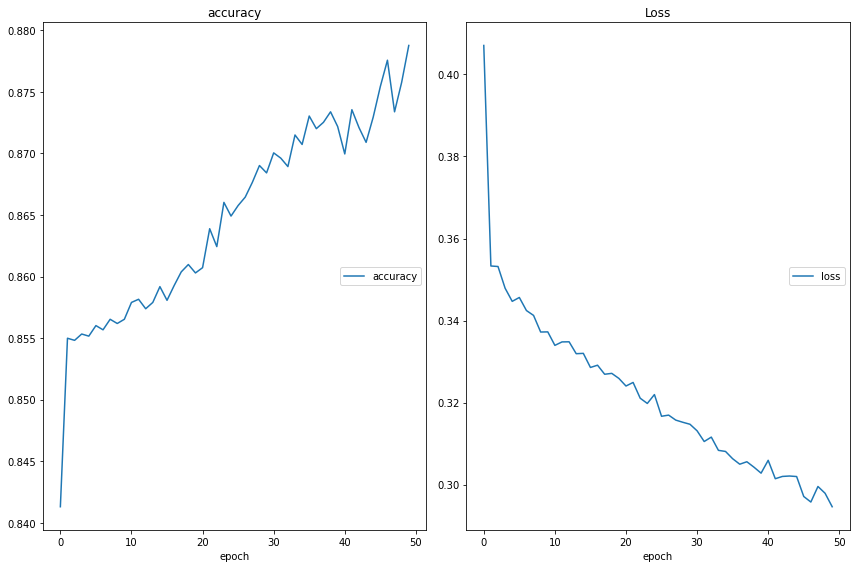

accuracy
	accuracy         	 (min:    0.841, max:    0.879, cur:    0.879)
Loss
	loss             	 (min:    0.295, max:    0.407, cur:    0.295)
234/234 [==============================] - 1s 4ms/step - loss: 0.2946 - accuracy: 0.8788


In [31]:
history = model.fit(x_train, y_train, 
          epochs=50, 
          batch_size=50, 
          callbacks=[PlotLossesKeras()],
          verbose=1)

- Performance with test data

In [32]:
preds=model.predict(x_test)
preds_classes=np.round(preds).astype(int)
print(classification_report(y_test, preds_classes))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1772
           1       0.82      0.82      0.82      1151

    accuracy                           0.86      2923
   macro avg       0.85      0.85      0.85      2923
weighted avg       0.86      0.86      0.86      2923



- Performance with train data

In [33]:
preds=model.predict(x_train)
preds_classes=np.round(preds).astype(int)
print(classification_report(y_train, preds_classes))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7063
           1       0.84      0.85      0.85      4626

    accuracy                           0.88     11689
   macro avg       0.87      0.87      0.87     11689
weighted avg       0.88      0.88      0.88     11689



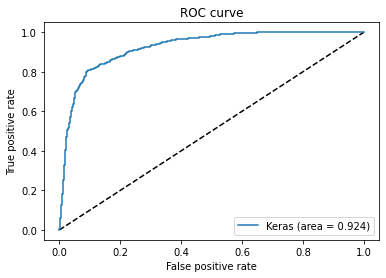

In [34]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

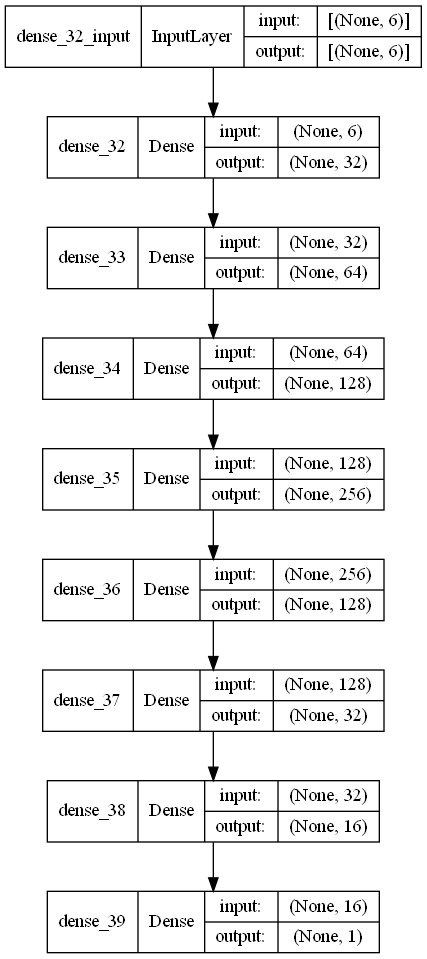

In [35]:
keras.utils.plot_model(model, show_shapes=True)

- Saving model

In [ ]:
model.save('LiqueANN.h5')

In [45]:
model = load_model('LiqueANN.h5')

- Saving scaler

In [18]:
import joblib
scaler_filename = "min_max_scaler_LiqueANN.save"
joblib.dump(min_max_scaler, scaler_filename) 
scaler = joblib.load(scaler_filename) 